# Polynomial Features🧪 and Regularizations 🎛️

As you go along you'll get to know about polynomial features, how to add them. And also about **regularizations**, so that you can come up with more💪 or fewer🤏 complex models minimizing the error.

The first thing we need to do is to import some relevant libraries.

## Import Libraries 📦

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Import Dataset 📄

We'll be using the `X_Y_Sinusoid_Data.csv` dataset.

A very simple, sparse data set that contains a column of x data and associated y noisy data.

In [3]:
data = pd.read_csv('../datasets/X_Y_Sinusoid_Data.csv')
data.head() #this returns top 5 rows of the dataset

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


## Extract Feature and Target Data 🤌

In [4]:
X = data[['x']]
y = data['y']

## Calculate Real Data 🔥

Let's calculate X and y data, which represents the "ground truth" (the real function) from the equation:  `y=sin(2πx)`

In [5]:
# generate approximately 100 equally spaced x data points over the range of 0 to 1
X_real = np.linspace(0, 1.0, 100)
# calculate the y-data
y_real = np.sin(2 * np.pi * X_real)

## Plot Sparse Data and Calculated Data 📊

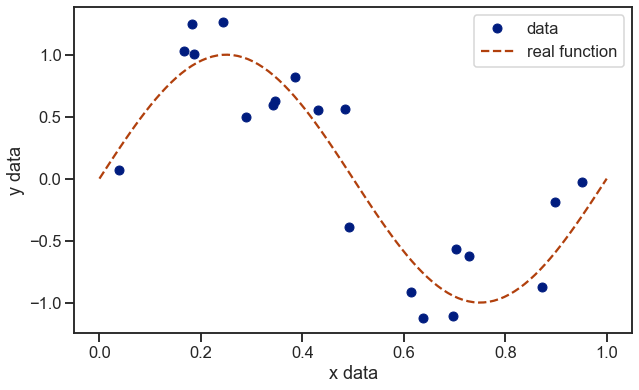

In [6]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('dark')
plt.figure(figsize =(10, 6))
# Plot of the noisy (sparse)
ax = data.set_index('x')['y'].plot(ls='', marker='o', label='data')
# Plot of the real function
ax.plot(X_real, y_real, ls='--', marker='', label='real function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data');

We want to make sure we find a model that fits closely to that red line and does not fit exactly to the extra random error that's built into there, but at the same time doesn't ignore the underlying model altogether.

## Adding Polynomial Features 🧪

We'll create 20th Order Polynomial Features and fit this data using linear regression.

Import `PolynomialFeatures` and `LinearRegression`

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [8]:
# setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree) # it is a transformer object, and transforms our data
# create and instance of linear regression
lr = LinearRegression()

In [9]:
# Create the polynomial features using the transformer object
X_poly = pf.fit_transform(X)
lr = lr.fit(X_poly, y)
y_pred = lr.predict(X_poly)

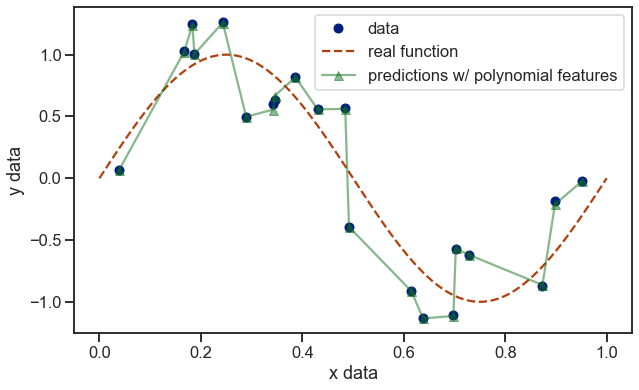

In [10]:
# Plot the result
plt.figure(figsize =(10, 6))
plt.plot(X, y, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, y_real, ls='--', label='real function')
plt.plot(X, y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

20-degree polynomial fit here perfectly to the data set. So if we want to generalize to a value that would probably fall somewhere on that red dot, we would probably miss out given the function that we used in order to come up with the fit that we have on our actual training set. So this is an example of overfitting, our polynomial degree is too high.

## Applying Regularization 🎛️

Now let's see how we can achieve that trade-off between bias and variance using **regularization**. We'll perform the **ridge** and **lasso** regression with the `alpha` value of `α=0.001` and `α=0.0001` respectively on the sinusoid data using polynomial features and plot the result.

`alpha` is a hyperparameter, the higher the alpha is, the less complex the model is and the lower the alpha is, the more complex the model is.

Import `Ridge`, `Lasso` from `sklearn.linear_model`

In [1]:
from sklearn.linear_model import Ridge, Lasso

In [11]:
# the ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, y)
Y_pred_rr = rr.predict(X_poly)

In [12]:
# the lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, y)
Y_pred_lr = lassor.predict(X_poly)

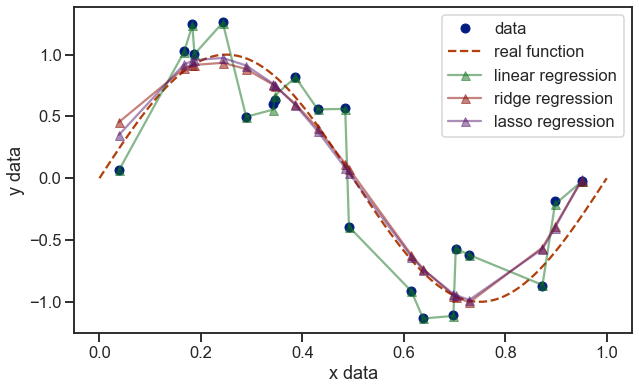

In [14]:
# The plot of the predicted values
plt.figure(figsize =(10, 6))
plt.plot(X, y, marker='o', ls='', label='data')
plt.plot(X_real, y_real, ls='--', label='real function')
plt.plot(X, y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

The green line was our initial linear regression function. Our ridge regression and lasso regression, are getting much closer to that true underlying function. So we have done a good job of regularizing, bringing down the complexity of the model. So we up to the bias, reduce the variance, and found a nice trade-off between bias and variance.